#### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* reading the data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# data analysis
* checking for missing values
* looking how data looks like
* reading data for better understanding using describe fucntion
* plotting some graphs to see visual represenation of factors

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
def countplot_data(data, feature):
    plt.figure(figsize = (10,10))
    sns.countplot(x = feature, data = data)
    plt.show()


def pairplot_data_grid(data, feature1, feature2, target):
    sns.FacetGrid(data, hue = target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()


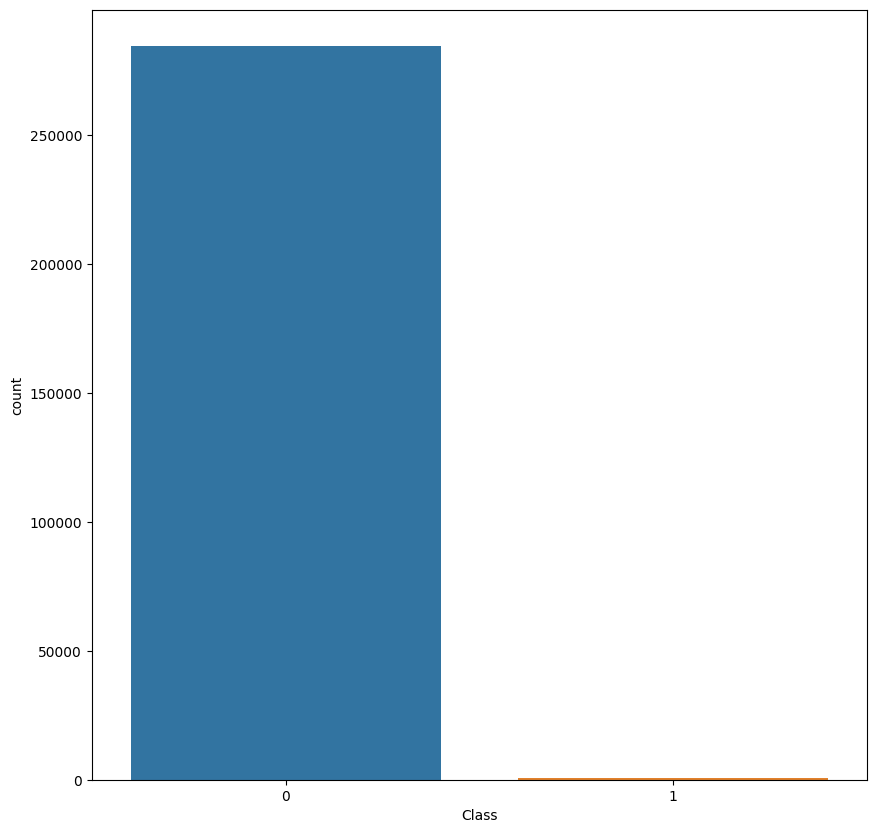

In [8]:
countplot_data(df, df['Class'])

# Insights:
* The dataset has 32 columns with unknown features labelled V1 to V28, Time, Amount and Class.
* The target variable is 'Class' and rest of the variable are input features.
* The Class has following values: 0: Legitimate Transactions,The dataset is hightly imbalanced as evident from the countplot with majority class label as '0' and very little values as class label '1',
* If model is build on such highly imbalanced data, it will suffer from overfitting and a non-deployable model.
* Hence, to overcome this, i have used SMOTE - synthetic minority oversampling technique to balance put the data.
* SMOTE -A preprocessing technique used to address a class imbalance in a dataset. It is based on sampling data from minority class by simply generating data points on the line segment connecting a randomly selected data points and one of itsK-nearest neighbours.

### Checking the realtionship of fraud transactions with amount of money

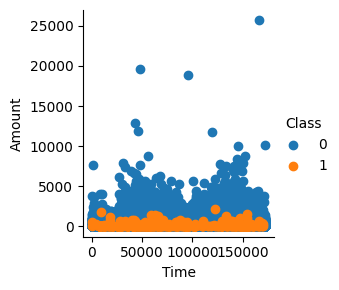

In [9]:
pairplot_data_grid(df, 'Time', 'Amount', 'Class')

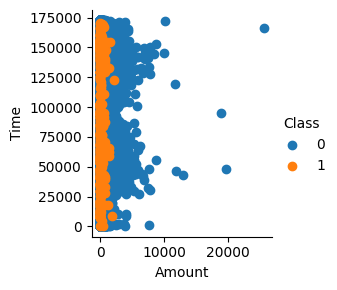

In [10]:
pairplot_data_grid(df, 'Amount', 'Time', 'Class')

* It can be observed that the fraud transactions are generally not abpve an amount of 2500.
* it can also be observed that the fraud transaction are evenly distributed about time.

In [11]:
df_refine = df[['Time', 'Amount', 'Class']]

In [12]:
amount_more = 0
amount_less = 0
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]['Amount'] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

449
284358


In [13]:
percent_loss = (amount_less / df.shape[0]) *100
percent_loss

99.84234938045763

Hence, it is observed that the 99.84% of transactions amount to less than 2500. Let's see how many of these are fraud and legitimate.

In [14]:
fraud = 0
legitimate = 1
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]['Amount'] < 2500):
        if(df_refine.iloc[i]['Class'] == 0):
            legitimate += 1
        else:
            fraud += 1
print(fraud)
print(legitimate)

492
283867


In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Thus, it can be concluded that since the number of fraud transaction below the amount of 2500 is same as thenumber of total fraud transactions. Hence, all fraud transations are less than 2500.

### Checking relationship between Time and Transactions

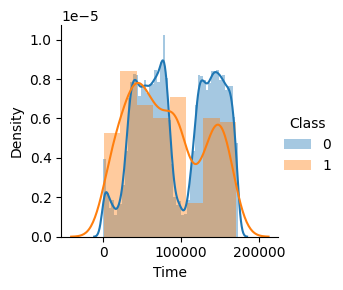

In [16]:
sns.FacetGrid(df_refine, hue = 'Class').map(sns.distplot, 'Time').add_legend()
plt.show()

* From the above distribution plot it is clear that the fradulent transactions are spread throught the time period.

### Modelling
* Study the Feature Correlations of the given data.
* Plot the Heatmap.
* Run GridSearch on the data.
* Fine tune the classifiers.
* Create Pipelines for evaluation.

<Axes: >

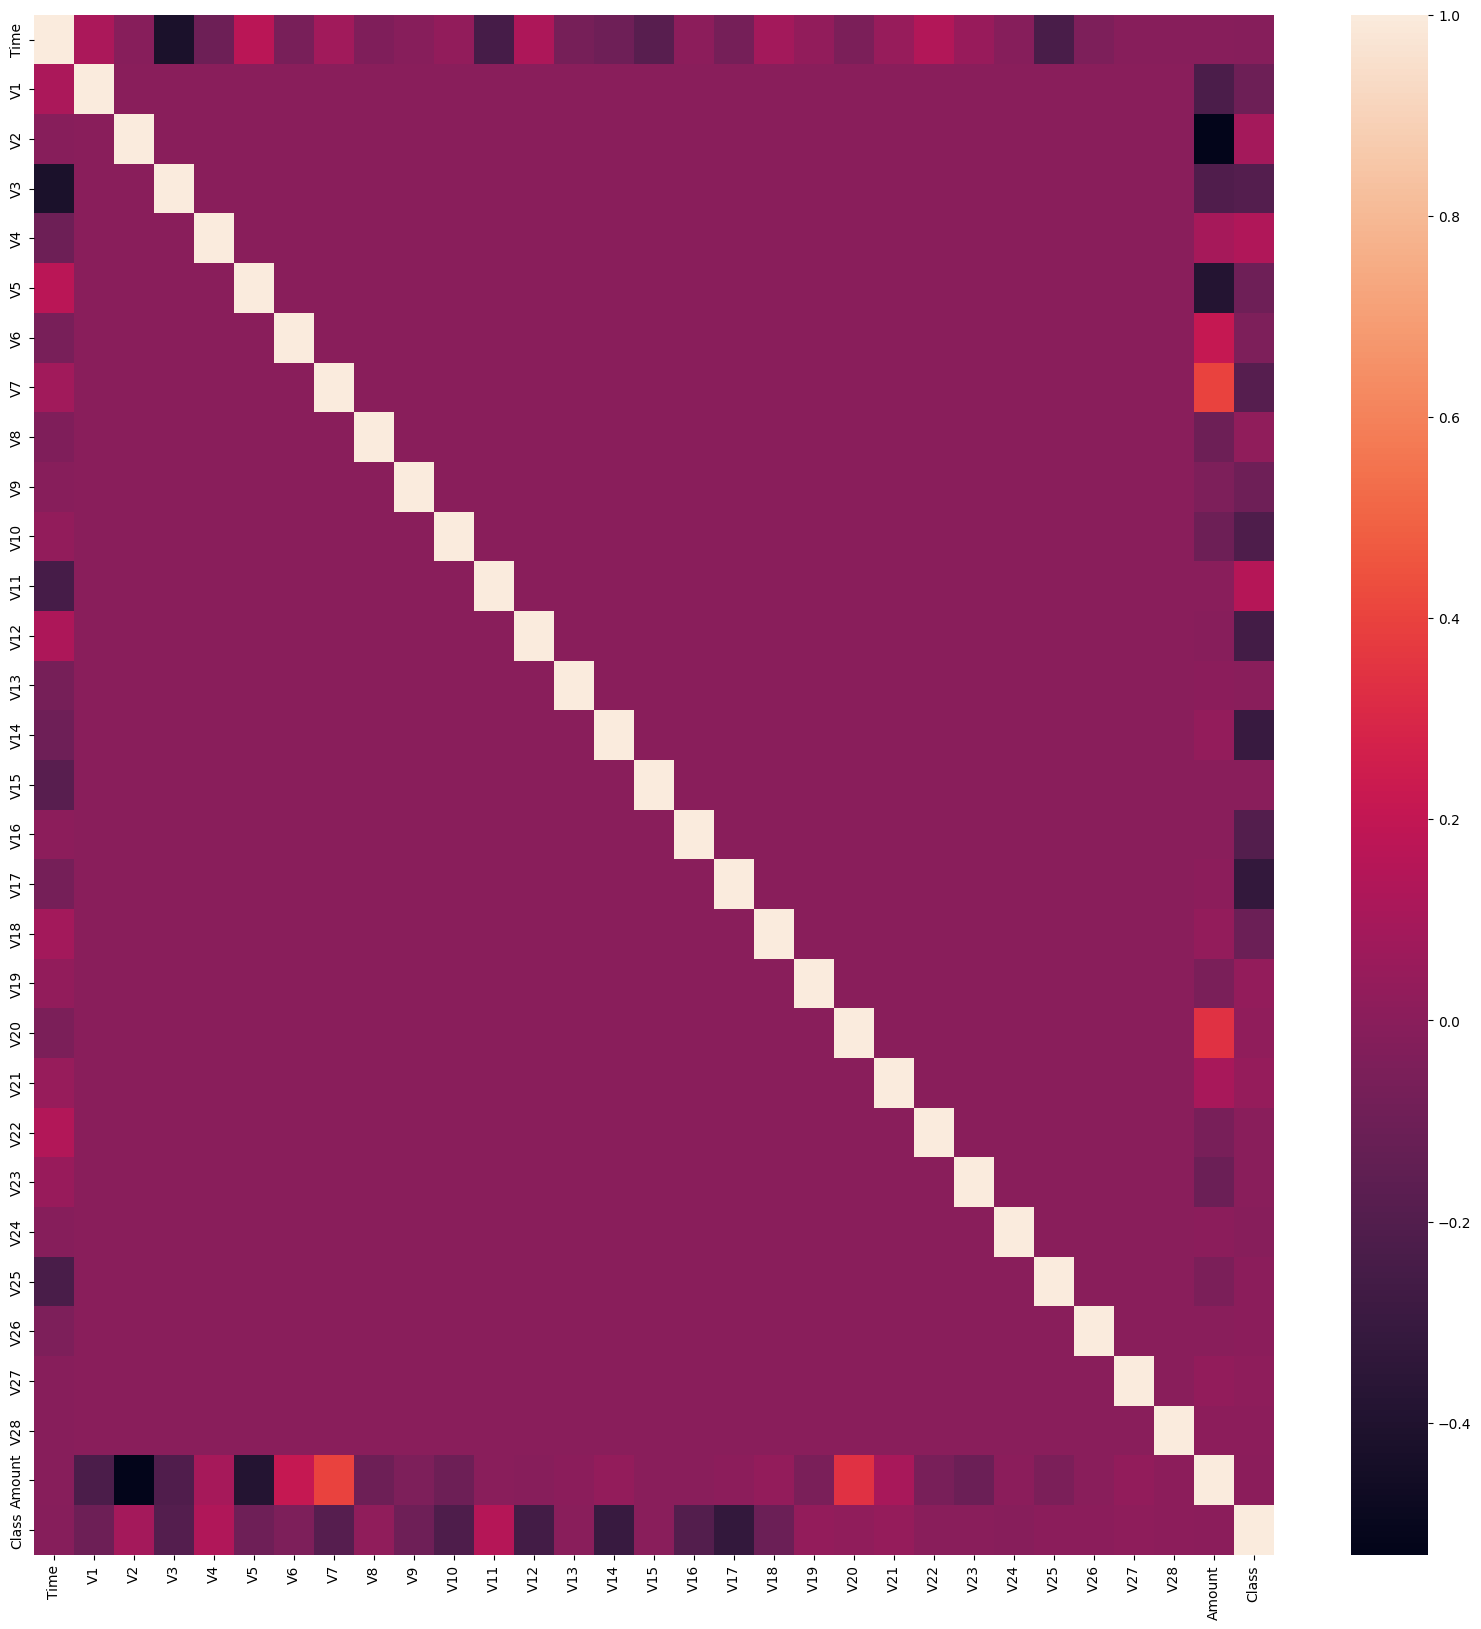

In [17]:
plt.figure(figsize = (20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

In [18]:
x = df.drop(['Class'], axis = 1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1, stratify=y)

### Balancing data using SMOTE

In [19]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [20]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data = mutual_info_classif(x_res, y_res, discrete_features=False, random_state=1), index = x_train.columns)

In [21]:
mutual_infos.sort_values(ascending = False)

V14       0.535044
V10       0.464775
V12       0.456052
V17       0.438193
V4        0.427427
V11       0.404040
Amount    0.392909
V3        0.387187
V16       0.335317
V7        0.304171
V2        0.291484
V9        0.256678
Time      0.247989
V21       0.235010
V27       0.229914
V1        0.220736
V18       0.198262
V8        0.174371
V6        0.171973
V28       0.170495
V5        0.157362
V20       0.107488
V19       0.099836
V23       0.067332
V24       0.063567
V26       0.046974
V25       0.031606
V22       0.031539
V13       0.024931
V15       0.022442
dtype: float64

<Axes: >

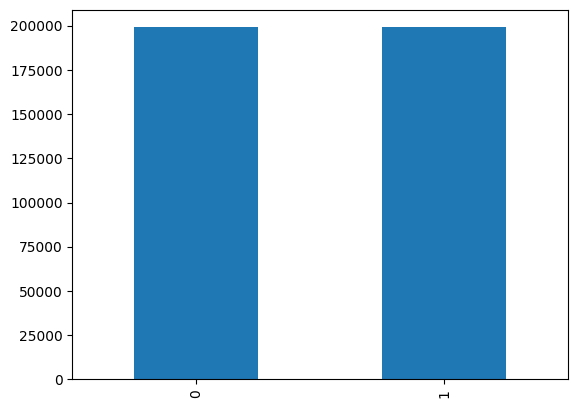

In [22]:
y_res.value_counts().plot(kind = 'bar')

Hence, it is safe to say that most correlated features after resolving class imbalance using SMOTE are V14, V10, V4, V12 and V17.

## Evaluation

Making use of AUC-ROC Score, Classification Report, Accuracy, and F1-Score to evaluate the performance of the classifiers.

In [23]:
#Evaluation of Classifiers
"""
    Method to compute the best score an dparameters computed by grid search paramater.
    grid_clf - the grid search classifier
"""
def grid_eval(grid_clf):
    print('Best Score', grid_clf.best_score_)
    print('Best Parameter',grid_clf.best_params_)



"""
    Method to compute to compute the following:
    1. Classification Report
    2. F1- Score
    3. AUC-ROC score
    4. Accuracy
    Parameters:
    y_test: the taget variable test set
    grid_clf: grid classifier selected
    x_test : input feature test set
"""
def evaluation(y_test, grid_clf, x_test):
    y_pred = grid_clf.predict(x_test)
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))

    print('F1-Score')
    print(f1_score(y_test, y_pred))

    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [24]:
# The parameters for each classifier are different
# Hence, setting pipelines for each classifier unique with parameters

param_grid_sgd = [{
    'model__loss':['log'],
    'model__penalty':['l1','l2'],
    'model__alpha':np.logspace(start = -3, stop=3, num=20)
},{
    'model__loss':['hinge'],
    'model__alpha':np.logspace(start=-3,stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy = False)),
    ('model',SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 1, warm_start = True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator = pipeline_sgd, param_grid=param_grid_sgd, scoring = MCC_scorer, n_jobs = 1, pre_dispatch='2*n_jobs', cv=5, verbose = 1, return_train_score=False)


grid_sgd.fit(x_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [25]:
grid_eval(grid_sgd)

Best Score 0.9560162686072134
Best Parameter {'model__alpha': 0.001, 'model__loss': 'log', 'model__penalty': 'l1'}


In [27]:
evaluation(y_test, grid_sgd, x_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.68      0.78       148

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.8377909417712454
F1-Score
0.7812500000000001
Accuracy
0.9993445923013002


In [28]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs = -1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid = param_grid_rf, scoring = MCC_scorer, n_jobs = -1, pre_dispatch = '2*n_jobs', cv = 5, verbose = 1, return_train_score = False)
grid_rf.fit(x_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [29]:
grid_eval(grid_rf)

Best Score 0.9997538267139271
Best Parameter {'model__n_estimators': 75}


In [30]:
evaluation(y_test, grid_rf, x_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.23      0.37       148

    accuracy                           1.00     85443
   macro avg       1.00      0.61      0.69     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.6148648648648649
F1-Score
0.37362637362637363
Accuracy
0.9986657771847899


In [35]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid = param_grid_lr, scoring = MCC_scorer, n_jobs = -1, pre_dispatch = '2*n_jobs', cv = 5, verbose = 1, return_train_score = False)
grid_lr.fit(x_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1, param_grid={'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [36]:
grid_eval(grid_lr)

Best Score 0.959816277887179
Best Parameter {'model__penalty': 'l2'}


In [37]:
evaluation(y_test, grid_lr, x_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.58      0.61      0.59       148

    accuracy                           1.00     85443
   macro avg       0.79      0.80      0.80     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.8036730235129906
F1-Score
0.594059405940594
Accuracy
0.9985604438046417


In [38]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(x_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [39]:
grid_eval(grid_knn)

Best Score 0.9980623930056313
Best Parameter {'model__p': 2}


In [40]:
evaluation(y_test, grid_knn, x_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.22      0.09      0.13       148

    accuracy                           1.00     85443
   macro avg       0.61      0.55      0.57     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.5469983348727706
F1-Score
0.13145539906103285
Accuracy
0.9978348138525098


# Conclusion
* The K-nearest neighbours classifier tuned with Grid Search with the best paramater being the Euclidean distance (p=2) outperforms its counterparts to give a test accuracy of nearly 99.8% and a perfect F1-Score with minimal overfitting.
* SMOTE overcomes overfitting by synthetically oversampling minority class labels and is successful to a great degree.

# Summary
* All fraud Transactions occur for an amount below 2500. Thus the bank can infer clearly that the fraudsters try to commit frauds of smaller amounts to avoid suspicion.
* The fraud transactions are euqitable distributed throghout time and there is no clear relationship of time with commiting of fraud.
* The number of fraud transactions are very few compared to legitimate transactions  and it has to be balanced in order for a fair comparison to prevent the model from overfitting.